In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings

In [2]:
# load and read training dataset from a csv file
train = pd.read_csv('blog.csv')

In [3]:
# make a copy of the original data
df = train.copy()
df.head(5)

,id,title,text
0,212,News,Ukrainian President Volodymyr Zelensky (left) ...
1,211,News,The Grilled Sirloin steak served with french f...
2,210,News,Moses Wetang'ula (left) and Musalia Mudavadi w...
3,209,News,Not every Valentine’s Day gesture or gift will...
4,208,News,Former Kiambu governor Ferdinand Waititu.\n\n\...


In [4]:
# replace special characters with a space 
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ",regex = True)

In [5]:
# chec the difference
df.head()

,id,title,text
0,212,News,Ukrainian President Volodymyr Zelensky left ...
1,211,News,The Grilled Sirloin steak served with french f...
2,210,News,Moses Wetang ula left and Musalia Mudavadi w...
3,209,News,Not every Valentine s Day gesture or gift will...
4,208,News,Former Kiambu governor Ferdinand Waititu By...


In [6]:
# remove words with less than 3 chracters long
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [7]:
# remove the id column from the dataset
df.drop(['id'], axis=1)

,title,text
0,News,Ukrainian President Volodymyr Zelensky left ta...
1,News,Grilled Sirloin steak served with french fries...
2,News,Moses Wetang left Musalia Mudavadi required br...
3,News,every Valentine gesture gift will work every w...
4,News,Former Kiambu governor Ferdinand Waititu Josep...
...,...,...
206,Agriculture,editors will review what submitted determine w...
207,Agriculture,African swine fever normally affects domestic ...
208,Agriculture,editors will review what submitted determine w...
209,Agriculture,murram road leads Seeds Gold team acre farm Ki...


In [8]:
# encode the title column.
# News = 0 $ Agriculture = 1
df.replace(to_replace=r'^News', value=0, regex=True,inplace=True)
df.replace(to_replace=r'^Agriculture', value=1, regex=True, inplace=True)

In [9]:
df.tail()

,id,title,text
206,6,1,editors will review what submitted determine w...
207,5,1,African swine fever normally affects domestic ...
208,4,1,editors will review what submitted determine w...
209,3,1,murram road leads Seeds Gold team acre farm Ki...
210,1,1,high nitrogen content fresh chicken manure mea...


In [10]:
# Split all entries in text column into a list of words
tokenized_blog = df['text'].apply(lambda x: x.split())
tokenized_blog.head()

0    [Ukrainian, President, Volodymyr, Zelensky, le...
1    [Grilled, Sirloin, steak, served, with, french...
2    [Moses, Wetang, left, Musalia, Mudavadi, requi...
3    [every, Valentine, gesture, gift, will, work, ...
4    [Former, Kiambu, governor, Ferdinand, Waititu,...
Name: text, dtype: object

In [11]:
from nltk import PorterStemmer

In [12]:
# Apply stemming to each word in text list
ps = PorterStemmer()
tokenized_blog = tokenized_blog.apply(lambda x: [ps.stem(i) for i in x])
tokenized_blog.head()

0    [ukrainian, presid, volodymyr, zelenski, left,...
1    [grill, sirloin, steak, serv, with, french, fr...
2    [mose, wetang, left, musalia, mudavadi, requir...
3    [everi, valentin, gestur, gift, will, work, ev...
4    [former, kiambu, governor, ferdinand, waititu,...
Name: text, dtype: object

In [13]:
# join all words of a text list to a string
for i in range(len(tokenized_blog)):
    tokenized_blog[i] = ' '.join(tokenized_blog[i])

df['text'] = tokenized_blog
df.head()

,id,title,text
0,212,0,ukrainian presid volodymyr zelenski left talk ...
1,211,0,grill sirloin steak serv with french fri garde...
2,210,0,mose wetang left musalia mudavadi requir bring...
3,209,0,everi valentin gestur gift will work everi wom...
4,208,0,former kiambu governor ferdinand waititu josep...


## Data Visualization

In [14]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

### News words visualization

In [15]:
# combine all texts that are news
all_news = ' '.join(text for text in df['text'][df['title']==0])

In [18]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='blue', height=1500, width=4000,mask=Mask).generate(all_news)

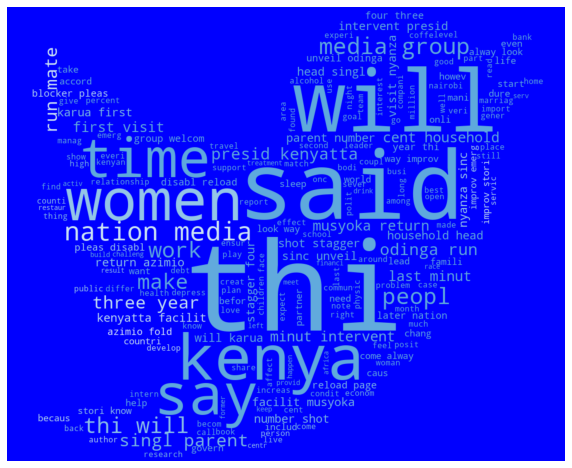

In [19]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

### Agriculture words visualization

In [21]:
# combine all texts that are news
all_agric = ' '.join(text for text in df['text'][df['title']==1])

In [23]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='green', height=1500, width=4000,mask=Mask).generate(all_agric)

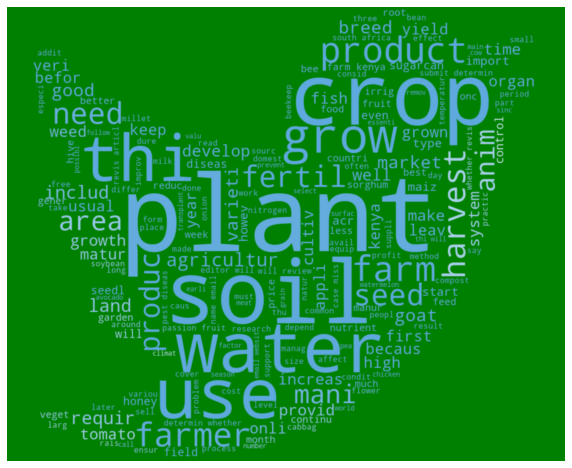

In [24]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

#### End of visualization

In [25]:
df

,id,title,text
0,212,0,ukrainian presid volodymyr zelenski left talk ...
1,211,0,grill sirloin steak serv with french fri garde...
2,210,0,mose wetang left musalia mudavadi requir bring...
3,209,0,everi valentin gestur gift will work everi wom...
4,208,0,former kiambu governor ferdinand waititu josep...
...,...,...,...
206,6,1,editor will review what submit determin whethe...
207,5,1,african swine fever normal affect domest popul...
208,4,1,editor will review what submit determin whethe...
209,3,1,murram road lead seed gold team acr farm kimum...


In [26]:
# drop id column from the dataset
df = df.drop('id', axis=1)

In [27]:
from sklearn.utils import shuffle

In [29]:
# shuffle data 
df = shuffle(df)
df = df.sample(frac=1).reset_index(drop=True)
df

,title,text
0,0,from left charl nasieku nation vice chair bahl...
1,1,editor will review what submit determin whethe...
2,0,vaccin most import invent field medicin fiona ...
3,0,wanjiku kibe faith muiruri ann wanjiku kibe ro...
4,0,have lost subscrib first time more than decad ...
...,...,...
206,1,time begin farm journey onli heifer need money...
207,1,infospac ultim inform space thi profit banana ...
208,0,kenya polic clifton miheso right celebr goal a...
209,0,simon mburu want avoid prostat cancer have wit...


In [30]:
# save the cleaned dataset to a file 
df.to_csv('clean.csv')